In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from zipfile import ZipFile

caminho = "/content/drive/MyDrive/módulo3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
dados.shape

(16556, 181)

In [ ]:
dados.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [ ]:
dados.select_dtypes(include="object")

""
0
1
2
3
4
...
16551
16552
16553
16554


In [ ]:
dados.select_dtypes(include="float64")

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


In [ ]:
dados["VB01001"].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [ ]:
dados["VB01001"].value_counts(normalize = True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [ ]:
frequencia = dados["VB11007"].value_counts()
frequencia

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [ ]:
percentual = dados["VB11007"].value_counts(normalize = True) * 100
percentual

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [ ]:
respostas = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito instisfeito",
    99: "Não Informado"
}
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

Sentimento em relação ao seu corpo,Frequência,Percentual
Satisfeito,6920,41.797536
Muito satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito instisfeito,714,4.312636
Não Informado,181,1.093259


In [ ]:
dados["IMC"] = dados["VB17003"]/ ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [ ]:
classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "normal", "sobrepeso", "obsidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"],
       bins = classes,
       labels = labels,
       include_lowest = True)

dados[["IMC", "CLASSE_IMC"]]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [ ]:
frequencia = dados["CLASSE_IMC"].value_counts()
percentual = dados["CLASSE_IMC"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
#dist_freq.rename(index = respostas, inplace = True)
#dist_freq.rename_axis("Sentimento em relação ao seu corpo", axis=1, inplace = True)
dist_freq

,Frequência,Percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obsidade,633,3.823387


In [ ]:
import numpy as np
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
dados["CLASSE_ALTURA"] = pd.cut(x = dados["VB17004"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_ALTURA"].value_counts()
percentual = dados["CLASSE_ALTURA"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [ ]:
dados["VB17004"].min()

124.1

In [ ]:
dados["VB17004"].max()

195.3

In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = True)
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,0.161996,0.116332
Satisfeito,0.210800,0.207176
Indiferente,0.057381,0.051764
Insatisfeito,0.047475,0.093018
Muito instisfeito,0.015704,0.027422
Não Informado,0.007188,0.003745


In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito instisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


In [ ]:
frequencia_cruzada = pd.crosstab(dados["VB11007"], dados["VB01001"], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, inplace = True)
frequencia_cruzada.rename(columns = {1: "Masculino", 2: "Feminino"}, inplace = True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito instisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


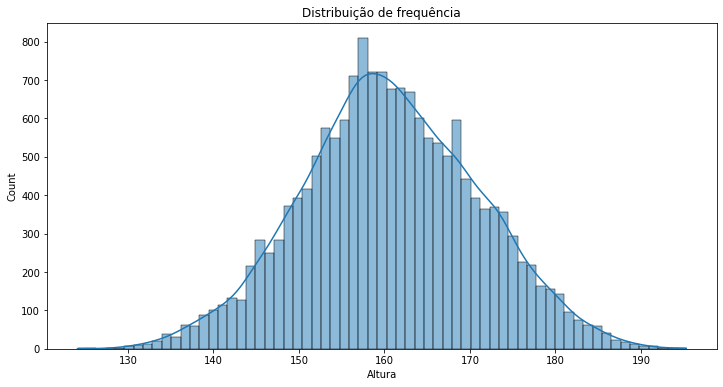

In [ ]:
import seaborn as sns

ax = sns.histplot(x = "VB17004", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax

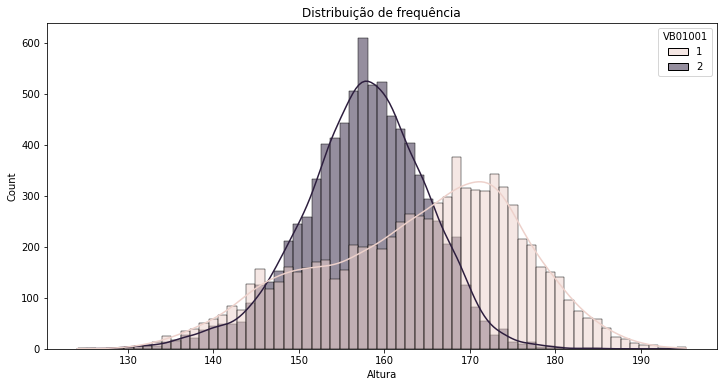

In [ ]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax

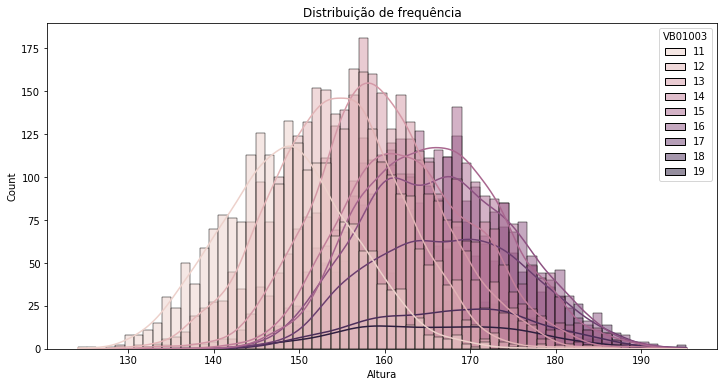

In [ ]:
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01003")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


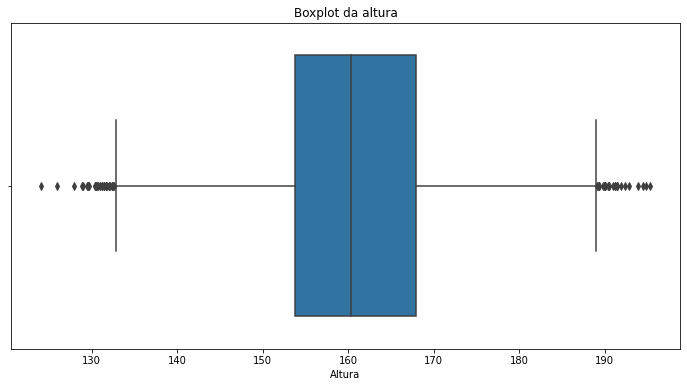

In [ ]:
ax = sns.boxplot(dados["VB17004"])
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax;

In [ ]:
dados["VB17004"].quantile(0.75)

167.9

In [ ]:
dados["VB17004"].max()

195.3

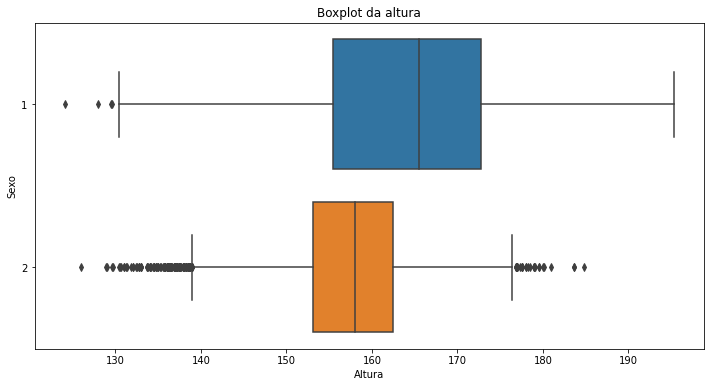

In [ ]:
ax = sns.boxplot(x = "VB17004", y = "VB01001", data = dados, orient = "h")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax.set_ylabel("Sexo")
ax;

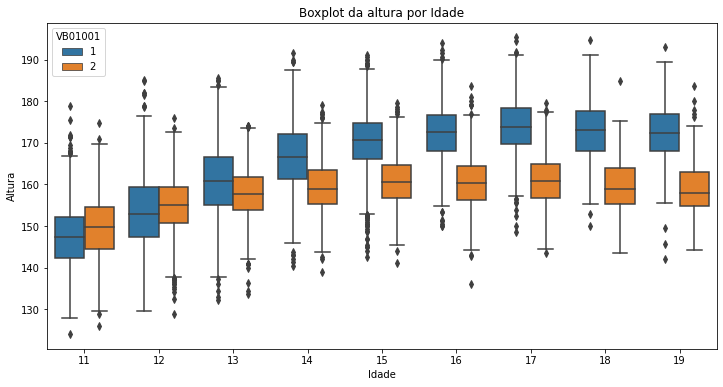

In [ ]:
ax = sns.boxplot(x = "VB01003", y = "VB17004", hue = "VB01001", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por Idade")
ax.set_ylabel("Altura")
ax.set_xlabel("Idade")
ax;

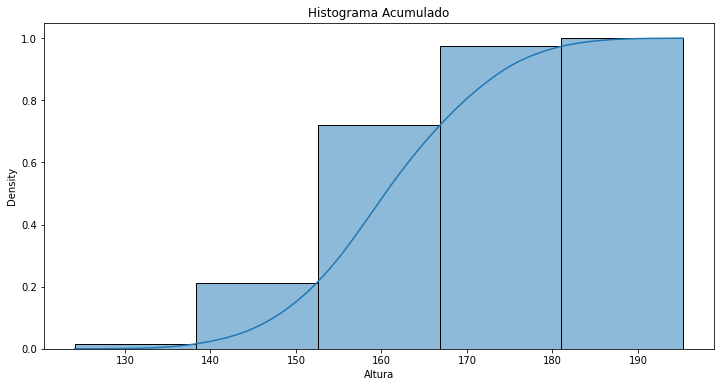

In [ ]:
ax = sns.histplot(x = "VB17004", data = dados, 
                  kde = True, 
                  cumulative = True,
                  stat = "density",
                  bins = 5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Histograma Acumulado")
ax.set_xlabel("Altura")
ax

In [ ]:
dados["VB17004"].mode()

0    160.0
dtype: float64

In [ ]:
dados["VB17004"].mean()

160.71311307078818

In [ ]:
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [ ]:
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [ ]:
salario_thiago = 9000
salario_allan = 1000
salario_medio_ds_alura = (salario_thiago+salario_allan)/2
salario_medio_ds_alura

5000.0

In [ ]:
media_altura =  dados["VB17004"].mean()
dados["MEDIA_ALTURA"] = media_altura
diferenca_das_media = dados["VB17004"] - media_altura
dados["DIFERENCA_MEDIA"] = diferenca_das_media

diferenca_quadrado = diferenca_das_media**2
dados["DIFERENCA_QUADRADO"] = diferenca_quadrado

dados[["VB17004", "MEDIA_ALTURA", "DIFERENCA_MEDIA", "DIFERENCA_QUADRADO"]]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [ ]:
variancia_amostral = (1/(len(dados)-1)) * dados["DIFERENCA_QUADRADO"].sum()
variancia_amostral

106.91705244049119

In [ ]:
106.9105945368652

106.9105945368652

In [ ]:
dados["VB17004"].mean()

160.71311307078818

In [ ]:
#160.7cm  106.9cm²

In [ ]:
desvio_padrao = np.sqrt(variancia_amostral)
desvio_padrao

10.340070233827776

In [ ]:
from statsmodels.stats.weightstats import zconfint

zconfint(dados["VB17004"].to_list())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(160.5556082427712, 160.87061789880892)

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

descricao_altura = DescrStatsW(dados["VB17004"])
descricao_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

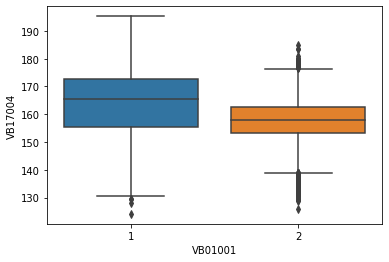

In [ ]:
sns.boxplot(x = "VB01001", y = "VB17004", data = dados);

In [ ]:
from statsmodels.stats.weightstats import ztest

distribuicao_altura_m = dados.query("VB01001 == 1")["VB17004"]
distribuicao_altura_f = dados.query("VB01001 == 2")["VB17004"]

_ , p_value = ztest(distribuicao_altura_m, distribuicao_altura_m)
p_value

1.0

In [ ]:
from scipy.stats import normaltest

_, p_value_normaltest_m = normaltest(distribuicao_altura_m)
_, p_value_normaltest_f = normaltest(distribuicao_altura_f)
print(p_value_normaltest_m)
print(p_value_normaltest_f)

7.695118853996524e-75
7.125189471020874e-47


In [ ]:
from scipy.stats import ranksums

ranksums(distribuicao_altura_m, distribuicao_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

## Desafio 01: Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

## Desafio 02: Estudar sobre a base de dados que vamos trabalhar.

## Desafio 03: Classificar algumas perguntas como QualitativaXQuantitativa 

## DEsafio 04: Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações

## Desafio 05: Criar uma tabela de frequência para o peso

## Desafio 06: Criar outros crosstab para analisar e pesquisar sobre o parâmetro aggfunc e testar.

## Desafio 07: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico

## Desafio 08: Fazer a análise com o histograma para outras informações da base de dados.

## DEsafio 09; Pesquisar como é determinado os outliers no boxplot do seaborn.

## Desafio 10: Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord

## DEsafio 11: Fazer o calculo da média por sexo e idade, através do crosstap

## Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta.

## Super-desafio 02: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM

## Desafio 12: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculas para as outras colunas numéricas.

## Desafio 13: O que intervalo de confiaça, nível de confiança e o que significancia.

## Desafio 14: Plotar o intervalo de confiança no histograma das alturas.

## Desafio 15: Realizar os testes de hipóteses de outras e explorar a base de dados

# Desafios

##Aula 1

###Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

In [ ]:
cd /content/drive/My Drive/módulo3

/content/drive/My Drive/módulo3


In [ ]:
!dir

arquivos\ csv	Dicionario_PENSE_Microdados_AMOSTRA2.xls
arquivos\ sas	PeNSE_2015_AMOSTRA2.zip
arquivos\ xlsx	portuguese


In [ ]:
!unzip PeNSE_2015_AMOSTRA2.zip

Archive:  PeNSE_2015_AMOSTRA2.zip
replace arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV  
  inflating: arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV  
  inflating: arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV  
  inflating: arquivos sas/pense_amostra2_aluno.sas7bdat  
  inflating: arquivos sas/pense_amostra2_alunoescola.sas7bdat  
  inflating: arquivos sas/pense_amostra2_escola.sas7bdat  
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx  
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx  
  inflating: arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx  
  inflating: Dicionario_PENSE_Microdados_AMOSTRA2.xls  


In [ ]:
!dir

arquivos\ csv	Dicionario_PENSE_Microdados_AMOSTRA2.xls
arquivos\ sas	PeNSE_2015_AMOSTRA2.zip
arquivos\ xlsx	portuguese


In [ ]:
caminho_arquivo = 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'

dados = pd.read_csv(caminho_arquivo, sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


###Desafio 02 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

### Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

Qual é o seu sexo?

Variável Qualitativa nominal

Qual é a sua idade?

Variável Quantitativa contínua

Qual é o mês do seu aniversário?

Variável Qualitativa ordinal

Contando com você, quantas pessoas moram na sua casa ou apartamento?

Variável Quantitativa discreta

Em que ano você nasceu?

Variável Qualitativa ordinal


Em que ano/série você está?

Variável Qualitativa ordinal

## Aula 2

###Desafio 04 - Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises

In [ ]:
def gera_frequencia_cruzada(coluna1, coluna2, dict_coluna1, dict_coluna2):
  frequencia_cruzada = pd.crosstab(dados[coluna1], dados[coluna2], normalize = "index") * 100
  frequencia_cruzada.rename(index = dict_coluna1, inplace = True)
  frequencia_cruzada.rename(columns = dict_coluna2, inplace = True)
  return frequencia_cruzada

In [ ]:
dict_VB11007 = {
    1: "Muito satisfeito",
    2: "Satisfeito",
    3: "Indiferente",
    4: "Insatisfeito",
    5: "Muito instisfeito",
    99: "Não Informado"
}

In [ ]:
dict_VB01001 = {1: "Masculino", 2: "Feminino"}

In [ ]:
gera_frequencia_cruzada("VB11007", "VB01001", dict_VB11007, dict_VB01001)

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito instisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


## Aula 3

### Desafio 05 - Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [ ]:
import numpy as np
tamanho_amostra = len(dados)

k = int((1 + ((10/3)*np.log10(tamanho_amostra))))
dados["CLASSE_PESO"] = pd.cut(x = dados["VB17003"],
       bins = k,
       include_lowest = True)

frequencia = dados["CLASSE_PESO"].value_counts()
percentual = dados["CLASSE_PESO"].value_counts(normalize = True) * 100
dist_freq = pd.DataFrame({"Frequência": frequencia, "Percentual": percentual })
dist_freq

,Frequência,Percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


###Desafio 06 - Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada.

In [ ]:
dict_VB01003 = {11: '11 anos ou menos', 12: '12 anos',
                13: '13 anos', 14: '14 anos', 15: '15 anos',
                16: '16 anos', 17: '17 anos', 18: '18 anos',
                19: '19 anos ou mais'}

In [ ]:
frequencia_cruzada = pd.crosstab(index=dados["VB11007"],
                                 columns=dados["VB01003"],
                                 normalize = "columns") * 100

frequencia_cruzada.rename(index = dict_VB11007, inplace = True)
frequencia_cruzada.rename(columns = dict_VB01003, inplace = True)
frequencia_cruzada.index.name = 'Como você se sente em relação ao seu corpo?'
frequencia_cruzada.columns.name = 'Qual é a sua idade?'
frequencia_cruzada

Qual é a sua idade?,11 anos ou menos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,18 anos,19 anos ou mais
Como você se sente em relação ao seu corpo?,,,,,,,,,
Muito satisfeito,44.353282,32.801822,32.760640,27.473043,21.278351,17.180617,17.826936,21.314387,27.700831
Satisfeito,33.832046,39.483675,38.305349,41.959681,45.278351,47.444934,46.324008,47.246892,41.551247
Indiferente,8.783784,10.554290,10.855135,10.736053,11.546392,11.762115,12.687053,12.433393,7.756233
Insatisfeito,7.335907,11.465452,11.245607,14.486639,17.278351,18.458150,18.477554,16.518650,16.620499
Muito instisfeito,4.247104,4.631739,5.232331,4.313174,3.587629,4.537445,3.903709,2.131439,4.432133
Não Informado,1.447876,1.063022,1.600937,1.031411,1.030928,0.616740,0.780742,0.355240,1.939058


In [ ]:
frequencia_cruzada = pd.crosstab(index=dados["VB11007"],
                                 columns=dados["VB01001"],
                                 values=dados["VB01003"],
                                 aggfunc='mean')

frequencia_cruzada.rename(index = dict_VB11007, inplace = True)
frequencia_cruzada.rename(columns = dict_VB01001, inplace = True)
frequencia_cruzada.index.name = 'Como você se sente em relação ao seu corpo?'
frequencia_cruzada.columns.name = 'Qual é o seu sexo?'
print('Media das idades')
frequencia_cruzada

Media das idades


Qual é o seu sexo?,Masculino,Feminino
Como você se sente em relação ao seu corpo?,,
Muito satisfeito,13.671514,13.301661
Satisfeito,14.400860,14.186297
Indiferente,14.440000,14.024504
Insatisfeito,14.651399,14.598052
Muito instisfeito,13.784615,14.033040
Não Informado,13.907563,13.290323


## Aula 4

### Desafio 07 - Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma.

In [ ]:
import matplotlib.pyplot as plt

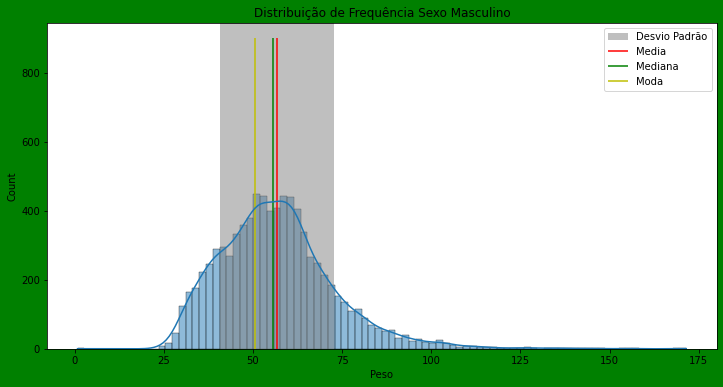

In [ ]:
dados_grafico = dados.query('VB01001 == 1')
#plotando o histograma da altura
ax = sns.histplot(data = dados_grafico, x = 'VB17003', kde=True)
#definindo o tamanho do plot
ax.figure.set_size_inches(12,6)
ax.figure.set_facecolor('g')
#setando título e label x
ax.set_title('Distribuição de Frequência Sexo Masculino')
ax.set_xlabel('Peso')
media = dados_grafico['VB17003'].mean()
std_media = [media + dados_grafico['VB17003'].std(), media - dados_grafico['VB17003'].std()]
ax.vlines(dados_grafico['VB17003'].mean(), ymin=0, ymax=900, color='r', label='Media')
plt.axvspan(std_media[1], std_media[0], facecolor='0.5', alpha=0.5, label="Desvio Padrão")
ax.vlines(dados_grafico['VB17003'].median(), ymin=0, ymax=900, color='g', label='Mediana')
ax.vlines(dados_grafico['VB17003'].mode(), ymin=0, ymax=900, color='y', label='Moda')
plt.legend()
ax;

###Desafio 08 - Fazer a análise com o histograma para outras informações da base de dados.

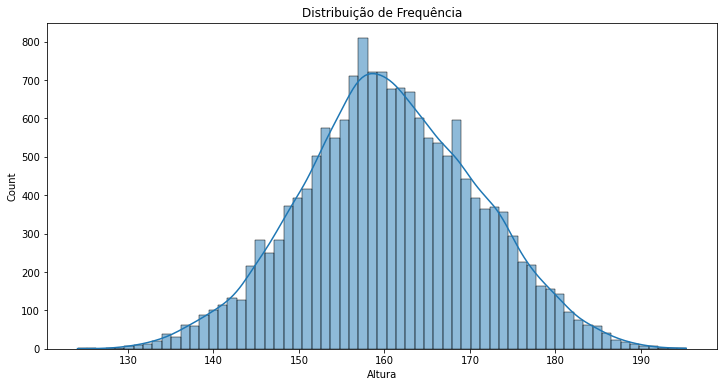

In [ ]:
dados_grafico = dados
nome_coluna = 'VB17004'
#plotando o histograma da altura
ax = sns.histplot(data = dados_grafico, x = nome_coluna, kde = True)
ax.figure.set_size_inches(12,6)
#setando título e label x
ax.set_title('Distribuição de Frequência')
ax.set_xlabel('Altura')
ax;

### Desafio 09 - **Pesquisar como é determinado os outliers no boxplot do seaborn. Calcular na mão utilizando a função .quantile()

https://seaborn.pydata.org/generated/seaborn.boxplot.html

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


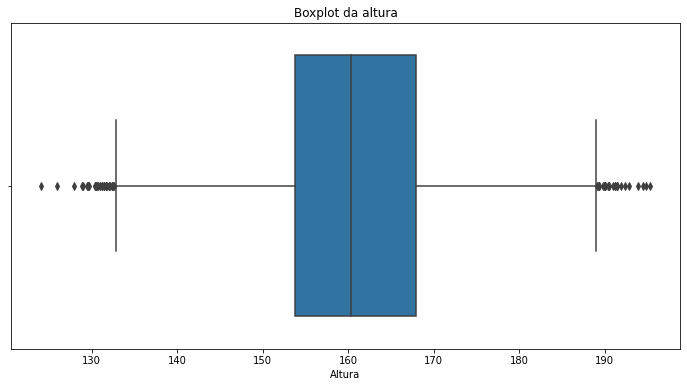

In [ ]:
ax = sns.boxplot(dados["VB17004"], whis=1.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax;

In [ ]:
whis = 1.5

In [ ]:
Q1 = dados["VB17004"].quantile(0.25)
Q3 = dados["VB17004"].quantile(0.75)
    
IQR = Q3 - Q1

In [ ]:
Q1 - whis * IQR

132.65000000000003

In [ ]:
Q3 + whis * IQR

189.05

## Aula 5

### Desafio 10 -Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord.

In [ ]:
dados["VB17004"].mode()

0    160.0
dtype: float64

In [ ]:
dados["VB17004"].mean()

160.71311307078818

In [ ]:
dados.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [ ]:
dados["VB17003"].mean()

54.70558105822677

In [ ]:
dados.groupby("VB01001")["VB17003"].mean()

VB01001
1    56.724436
2    52.682332
Name: VB17003, dtype: float64

### Desafio 11 - Fazer o calculo da média por sexo e idade, através do crosstab

In [ ]:
dados.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [ ]:
pd.crosstab(index=dados['VB01001'], columns=dados['VB01003'], values=dados['VB17004'], aggfunc=np.mean)

VB01003,11,12,13,14,15,16,17,18,19
VB01001,,,,,,,,,
1,147.617753,153.696764,160.719801,166.406922,170.336297,172.424933,173.814341,173.024561,172.143158
2,149.522512,154.965021,157.673105,159.340320,160.759848,160.386527,160.907937,159.438462,158.977193


### Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta.

In [ ]:
df_dict = pd.read_excel('https://github.com/IgorNascAlves/data-science-primeiros-passos/blob/master/Dicionario_PENSE_Microdados_AMOSTRA2.xls?raw=true')
def get_question_description(colum_name) -> dict:
    
    return_dict = dict()

    description_row = df_dict.query(f'VARIÁVEL == "{colum_name}"')['QUESTIONÁRIO DO ALUNO']
    return_dict['Pergunta'] = description_row.values[0]
   
    values = list()
    index = description_row.index[0] + 1
    value = df_dict.iloc[index]['VARIÁVEL']
    
    # foi necessario verificar se o primeiro caracter não é '-' que é utilizado na representação do -1
    while str(value)[0].isnumeric() or str(value)[0] == '-':
        values.append([value, df_dict.iloc[index]['QUESTIONÁRIO DO ALUNO']])
        index += 1
        value = df_dict.iloc[index]['VARIÁVEL']
    return_dict['Descrição'] = dict(values)
    
    return return_dict

In [ ]:
get_question_description('V0041')

{'Descrição': {-1: 'Pulo no questionário',
  1: 'Particular',
  2: 'Comunitária',
  3: 'Confessional',
  4: 'Filantrópica'},
 'Pergunta': 'Tipo de escola privada'}

In [ ]:
get_question_description('VB01025')

{'Descrição': {'1': 'Ensino Fundamental ',
  '2': 'Ensino Médio',
  '3': 'Ensino Médio Técnico',
  '4': 'Ensino Superior',
  '5': 'Pós-graduação',
  '6': 'Não sei',
  99: 'Não informado'},
 'Pergunta': 'Qual o grau de escolaridade mais elevado que você pretendo concluir?'}

### Super-desafio 02: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM...

In [ ]:
df_dict = pd.read_excel('https://github.com/IgorNascAlves/data-science-primeiros-passos/blob/master/Dicionario_PENSE_Microdados_AMOSTRA2.xls?raw=true')

In [ ]:
df_dict.head(10)

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte
5,2,Nordeste
6,3,Sudeste
7,4,Sul
8,5,Centro-Oeste
9,VB00004,"Prezado(a) estudante, você concorda em partici..."


In [ ]:
lista_perguntas = [df_dict.iloc[ind]['QUESTIONÁRIO DO ALUNO'] for ind in range(len(df_dict)) if not str(df_dict.iloc[ind]['VARIÁVEL'])[0].isnumeric() and str(df_dict.iloc[ind]['VARIÁVEL'])[0] != '-']
df_lista_perguntas = pd.DataFrame(lista_perguntas, columns=['Pergunta'])
df_lista_perguntas.head()

,Pergunta
0,Ano em que a pesquisa foi realizada
1,País
2,Região geográfica
3,"Prezado(a) estudante, você concorda em partici..."
4,Qual é o seu sexo?


https://github.com/alura-cursos/pln-com-python/blob/master/Aula5.ipynb

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()

for opiniao in df_lista_perguntas["Pergunta"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df_lista_perguntas["tratamento_1"] = frase_processada

In [ ]:
df_lista_perguntas.head()

,Pergunta,tratamento_1
0,Ano em que a pesquisa foi realizada,Ano pesquisa realizada
1,País,País
2,Região geográfica,Região geográfica
3,"Prezado(a) estudante, você concorda em partici...","Prezado(a) estudante, concorda participar dess..."
4,Qual é o seu sexo?,Qual sexo?


## Aula 6

### Desafio 12: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculas para as outras colunas numéricas.

In [ ]:
dados[['VB01003', 'VB01010A', 'VB01019']].describe()

,VB01003,VB01010A,VB01019
count,16556.000000,16556.000000,16556.000000
mean,14.095917,4.472457,2.646895
std,2.127947,3.235230,2.834142
min,11.000000,1.000000,1.000000
25%,12.000000,3.000000,2.000000
50%,14.000000,4.000000,2.000000
75%,16.000000,5.000000,3.000000
max,19.000000,99.000000,99.000000


### Desafio 13: Ler e pesquisar sobre o que intervalo de confiança, nível de confiança e o que significância.

### Desafio 14: Plotar o intervalo de confiança no histograma das alturas.

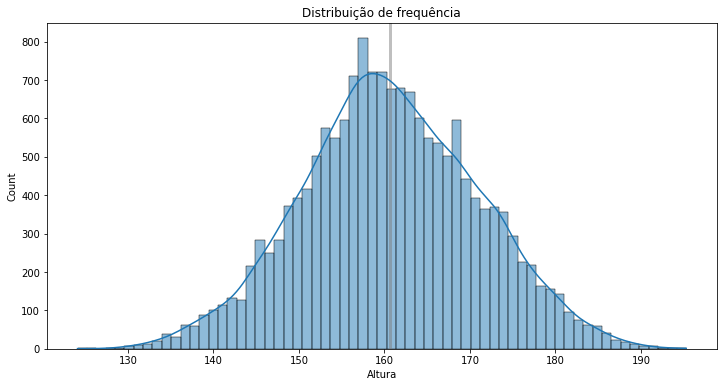

In [ ]:
import seaborn as sns
intervalo_confianca = descricao_altura.tconfint_mean()
ax = sns.histplot(x = "VB17004", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
plt.axvspan(intervalo_confianca[1], intervalo_confianca[0], facecolor='0.5', alpha=0.5, label="intervalo de confiança")
ax

### Desafio 15: Realizar os testes de hipóteses de outras informações, explorando e enriquecendo a análise dos dados.